In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-comments-spam-dataset/Youtube-Spam-Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/youtube-comments-spam-dataset/Youtube-Spam-Dataset.csv")

In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [4]:
df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


Correct Date Column

In [6]:
df['Date'] = pd.to_datetime(df['DATE'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

Visualize the distribution of spam vs. non-spam comments.

In [7]:
df_spam = df[df['CLASS'] == 1]
df_non_spam = df[df['CLASS'] == 0]

In [8]:
spam_count = df_spam.shape[0]
spam_count

1005

In [9]:
non_spam_count = df_non_spam.shape[0]
non_spam_count

951

[Text(0, 0, 'Non-Spam'), Text(1, 0, 'Spam')]

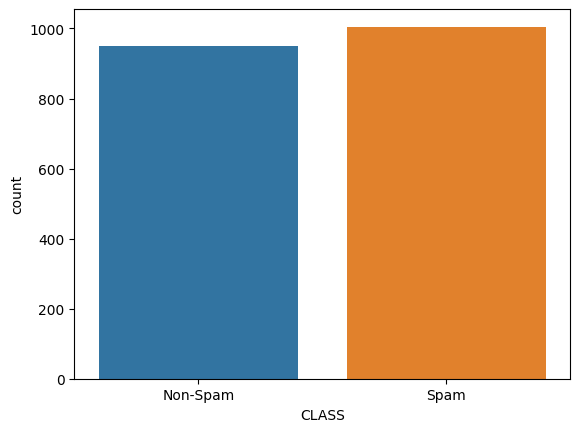

In [10]:
ax1 = sns.countplot(df, x='CLASS')
ax1
category = ['Non-Spam','Spam']
ax1.set_xticklabels(category)

Most common phrase in spam comments

In [11]:
common_spam = df_spam['CONTENT'].mode()
common_spam

0    Check out this video on YouTube:﻿
Name: CONTENT, dtype: object

Explore the relationship between comment date, video type, and spam likelihood.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

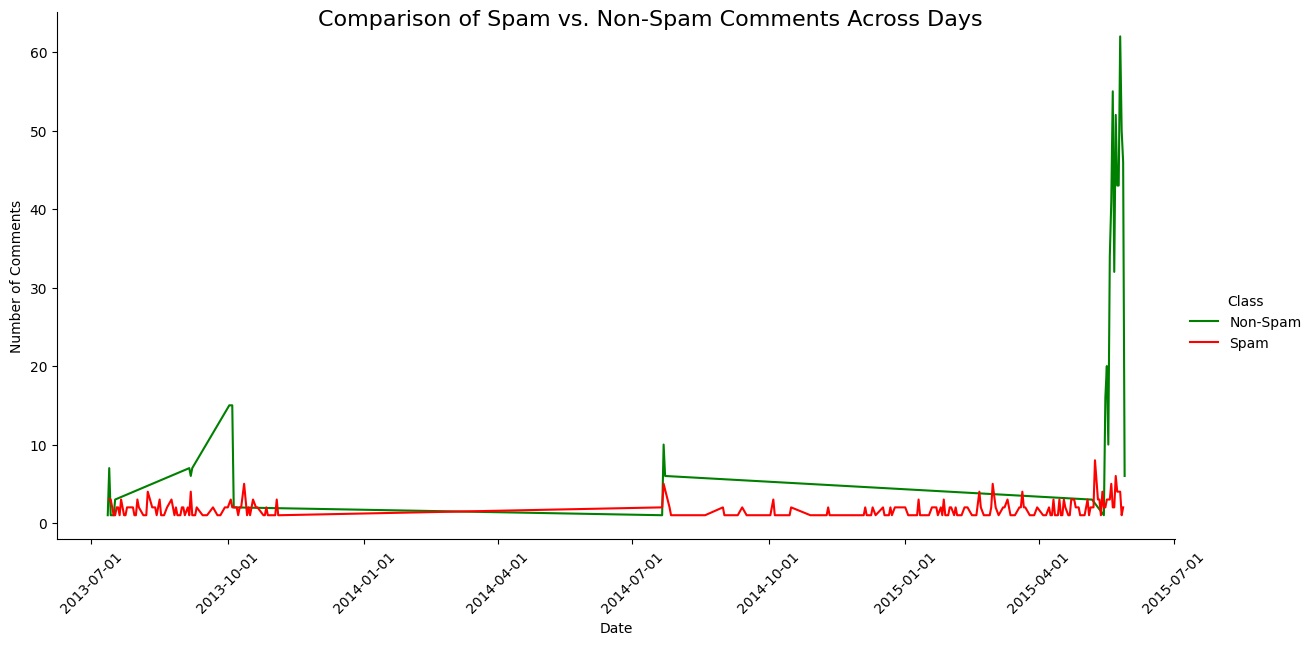

In [12]:
daily_counts = df.groupby([df['Date'].dt.date, 'CLASS']).size().reset_index(name='Count')

class_labels = {0: 'Non-Spam', 1: 'Spam'}
daily_counts['Class'] = daily_counts['CLASS'].map(class_labels)

g1 = sns.relplot(
    data=daily_counts, 
    x='Date', y='Count', 
    hue='Class', 
    kind='line', 
    palette={'Spam': 'red', 'Non-Spam': 'green'},
    height=6, aspect=2, 
)

g1.fig.suptitle('Comparison of Spam vs. Non-Spam Comments Across Days', fontsize=16)
g1.set_axis_labels('Date', 'Number of Comments')
g1.set_xticklabels(rotation=45)



[Text(0, 0, 'Eminem - Love The Way You Lie ft. Rihanna'),
 Text(1, 0, 'Katy Perry - Roar'),
 Text(2, 0, 'LMFAO - Party Rock Anthem ft. Lauren Bennett, GoonRock'),
 Text(3, 0, 'PSY - GANGNAM STYLE(?????) M/V'),
 Text(4, 0, 'Shakira - Waka Waka ')]

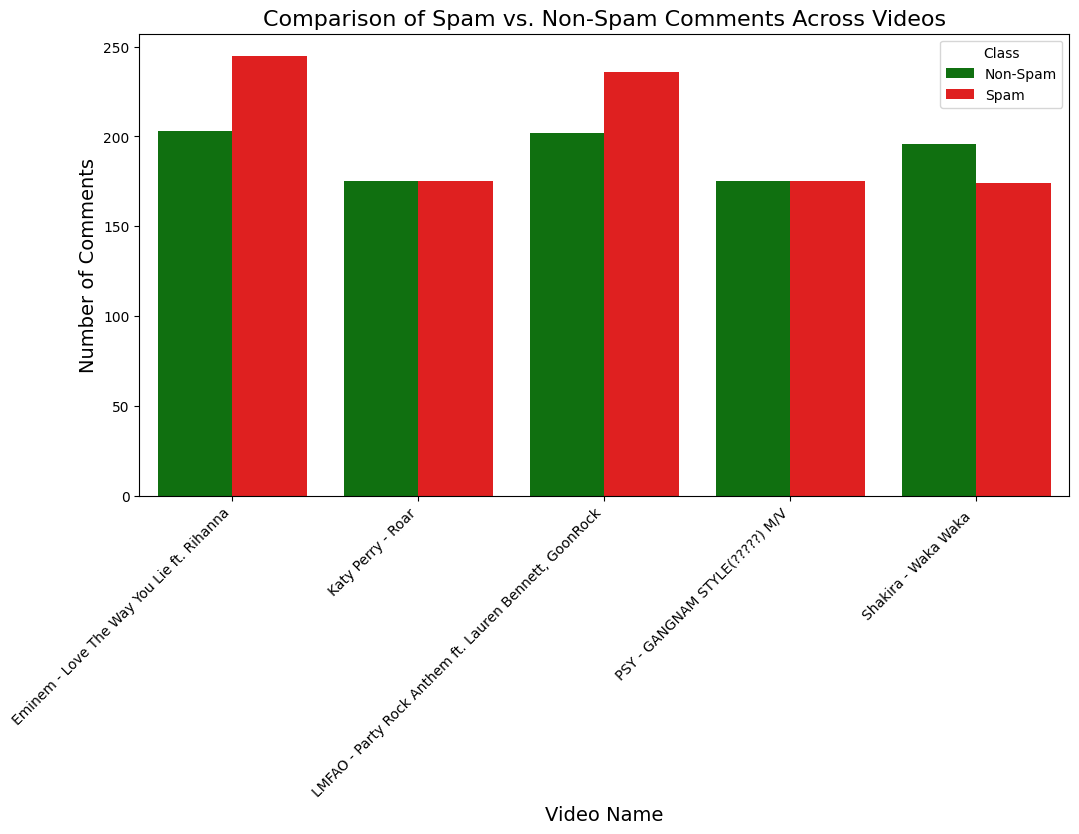

In [13]:
video_counts = df.groupby([df['VIDEO_NAME'], 'CLASS']).size().reset_index(name='Count')

class_labels = {0: 'Non-Spam', 1: 'Spam'}
video_counts['Class'] =  video_counts['CLASS'].map(class_labels)

plt.figure(figsize=(12, 6))

g2 = sns.barplot(
    data=video_counts, 
    x='VIDEO_NAME', y='Count', 
    hue='Class',  
    palette={'Spam': 'red', 'Non-Spam': 'green'},
    
)

plt.title('Comparison of Spam vs. Non-Spam Comments Across Videos', fontsize=16)
g2.set_xlabel('Video Name', fontsize=14)
g2.set_ylabel('Number of Comments', fontsize=14)

g2.set_xticklabels(g2.get_xticklabels(), rotation=45, ha='right', fontsize=10)

Detect Authors that are the most frequent spammers.

In [14]:
author_counts = df_spam.groupby([df_spam['AUTHOR']]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(20)
author_counts

,AUTHOR,Count
407,M.E.S,8
584,Shadrach Grentz,7
401,Louis Bryant,7
159,DanteBTV,6
406,LuckyMusiqLive,5
275,Hidden Love,5
170,Derek Moya,5
577,Scott Johnson,4
310,James Cook,4
550,RapStarz Coleman,4


# **Machine Learning models**

**Preprocess the text data by cleaning and vectorizing the Content column.**

Remove URLS and special characters

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def clean_content(text):
    text = re.sub(r"http\S+", "", text)
    
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if word.isalnum()]
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    cleaned_content = ' '.join(tokens).lower().strip()
    
    return cleaned_content

In [16]:
df['Clean Content'] = df['CONTENT'].apply(clean_content)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['Clean Content'])
y = df['CLASS']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = classification_report(y_test, y_pred)
print(cm)

print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       176
           1       0.95      0.83      0.89       216

    accuracy                           0.88       392
   macro avg       0.89      0.89      0.88       392
weighted avg       0.89      0.88      0.88       392

Accuracy: 0.8826530612244898


**ROC Graph**

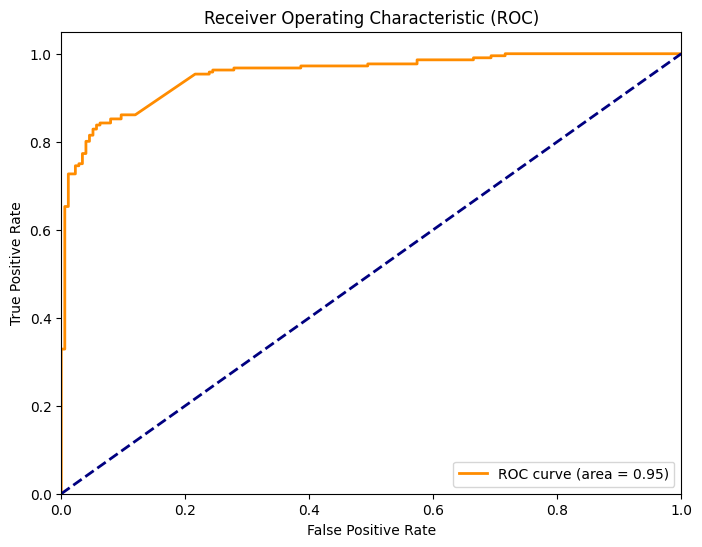

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**Precision-Recall Curve**

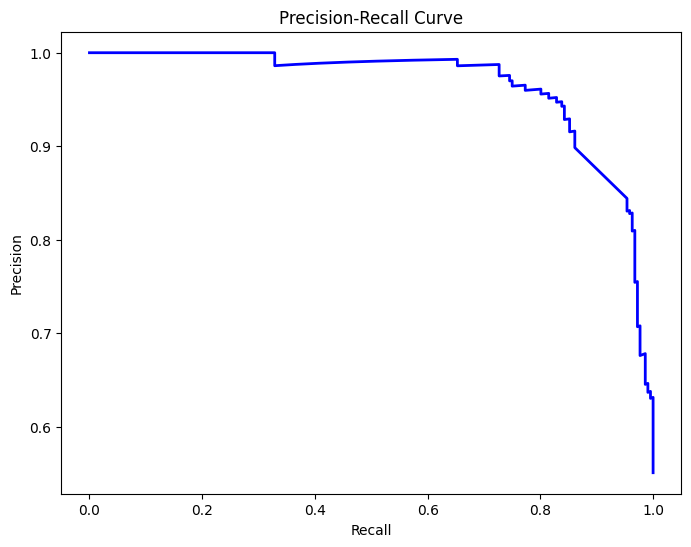

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()